In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from joblib import dump

In [2]:
# Load dataset from sklearn
cancer = load_breast_cancer()

# Display dataset information
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# Set feature and targets
X = cancer.data
y = cancer.target

# Split into training and testing data; not sure if y should be stratified. Must look into this more
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [4]:
# Create a StandardScaler model and fit it to the training data
X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create Logistic Regression Model

In [5]:
# Figure out whether we should be using scaled data or not; update as necessary
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_score = log_model.score(X_test_scaled, y_test)
print(log_score)

0.916083916083916


/Users/gretelup/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Create SVM

In [6]:
# Create the GridSearchCV model
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01],
             'kernel': ['rbf', 'linear', 'sigmoid']}
svc = SVC()
grid = GridSearchCV(svc, param_grid, verbose=3, cv=3)

# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6408450704225352, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6267605633802817, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6267605633802817, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.9507042253521126, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.9225352112676056, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV]  C=1, gamma=0.0001, kernel=linear, score=0.9366197183098591, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.001, kernel=rbf, score=0.8591549295774648, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.852112676056338, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV]  C=1, gamma=0.001, kernel=rbf, score=0.852112676056338, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9507042253521126, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9225352112676056, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.9366197183098591, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV]  C=1, gamma=0.001, kernel=sigmoid, score=0.8309859154929577, total=   0.0s
[CV] C=1, gamma=0.001, kernel=s

[CV]  C=10, gamma=0.001, kernel=linear, score=0.9225352112676056, total=   0.0s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV]  C=10, gamma=0.001, kernel=linear, score=0.9295774647887324, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.9014084507042254, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.8802816901408451, total=   0.0s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV]  C=10, gamma=0.001, kernel=sigmoid, score=0.8943661971830986, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9225352112676056, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV]  C=10, gamma=0.01, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=10, gamma=0.

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:    0.6s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01], 'kernel': ['rbf', 'linear', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [7]:
# Find the best parameters based on gridsearch
svm_param = grid.best_params_
print(svm_param)
print(grid.best_score_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.9366197183098591


In [8]:
svm_model = SVC(C=1, gamma=0.0001, kernel="linear")
svm_model.fit(X_train_scaled, y_train)
svm_score = svm_model.score(X_test_scaled, y_test)
print(svm_score)

0.9300699300699301


# Random Forest Classifier

In [9]:
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf_score = rf.score(X_test_scaled, y_test)
print(rf_score)

0.958041958041958


# KNN Classifier

k: 1, Train/Test Score: 1.000/0.937
k: 3, Train/Test Score: 0.951/0.930
k: 5, Train/Test Score: 0.946/0.930
k: 7, Train/Test Score: 0.946/0.944
k: 9, Train/Test Score: 0.939/0.944
k: 11, Train/Test Score: 0.937/0.951
k: 13, Train/Test Score: 0.939/0.944
k: 15, Train/Test Score: 0.939/0.930
k: 17, Train/Test Score: 0.932/0.930
k: 19, Train/Test Score: 0.932/0.930
k: 21, Train/Test Score: 0.930/0.930
k: 23, Train/Test Score: 0.932/0.937
k: 25, Train/Test Score: 0.927/0.937
k: 27, Train/Test Score: 0.927/0.930
k: 29, Train/Test Score: 0.927/0.923
k: 31, Train/Test Score: 0.927/0.923
k: 33, Train/Test Score: 0.927/0.923
k: 35, Train/Test Score: 0.927/0.923
k: 37, Train/Test Score: 0.925/0.923
k: 39, Train/Test Score: 0.927/0.923
k: 41, Train/Test Score: 0.925/0.923
k: 43, Train/Test Score: 0.923/0.923
k: 45, Train/Test Score: 0.920/0.930
k: 47, Train/Test Score: 0.918/0.930
k: 49, Train/Test Score: 0.918/0.930


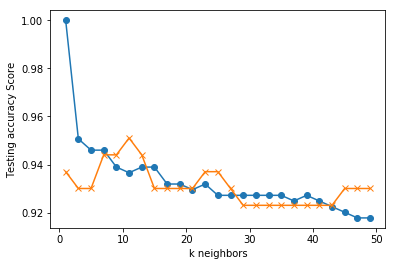

In [10]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k=27 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score)

0.9300699300699301


# Deep Learning

In [12]:
# Label-encode data set

# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

In [13]:
# Determine accuracy metric 

In [14]:
# Compare accuracy measures and determine best model

In [15]:
# If model is the best model to be found, save the model
# Update this when we figure out the best model; for now testing based on rf

dump(rf, 'cancer_model.joblib')

['cancer_model.joblib']